In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb, n=6)

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) <- newnames
head(airbnb)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
airbnb$CodigoPostal[(airbnb$CodigoPostal=="-" | airbnb$CodigoPostal == 28)] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="Madrid\n28004" | airbnb$CodigoPostal== 2804 ] <- 28004
airbnb$CodigoPostal[airbnb$CodigoPostal=="28051\n28051"] <- 28051
airbnb$CodigoPostal[airbnb$CodigoPostal=="28002\n28002"] <- 28002
airbnb$CodigoPostal[airbnb$CodigoPostal==2805] <- 28005
airbnb$CodigoPostal[airbnb$CodigoPostal==2815 | airbnb$CodigoPostal==28015] <- 28015


In [7]:
airbnb$CodigoPostal[!grepl("^28", airbnb$CodigoPostal)] <- NA
#na.omit(airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [40]:
unique(airbnb$CodigoPostal)

[1] 28004  28015  28013  28005  28012  28014  28045  <NA>   28007  28028 
[11] 28009  28001  28006  28010  28002  28034  28050  28008  28011  28049 
[21] 28038  28053  28047  28025  28019  28024  28016  28036  28046  28039 
[31] 28020  28003  28029  28054  28041  28026  28058  28018  28030  28017 
[41] 28027  28043  28033  28055  28021  28032  28037  28022  28042  28094 
[51] 280013 28035  28040  28031  28044  28105  28023  28051  28850  28048 
[61] 28056  28060  28052 
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [42]:
tail(sort(table(airbnb$CodigoPostal)), 5)

head(sort(table(airbnb$CodigoPostal)), 5) ##



28014 28013 28005 28004 28012 
  630  1019  1195  1795  2060 


          - 20013 20126  2015 
    0     0     0     0     0 

¿Cuales son los barrios que hay en el código postal 28012?

In [10]:
unique(airbnb$Barrio[airbnb$CodigoPostal =="28012"])

[1] Sol             Acacias         <NA>            Palos de Moguer
 [5] Embajadores     Cortes          Palacio         Universidad    
 [9] Delicias        Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [11]:
#table(airbnb$Barrio[airbnb$CodigoPostal =="28012"]) #
table(unique(airbnb$Barrio[airbnb$CodigoPostal =="28012"]))


                      Abrantes                        Acacias 
                             0                              1 
                       Adelfas                     Aeropuerto 
                             0                              0 
                       Aguilas               Alameda de Osuna 
                             0                              0 
                       Almagro                       Almenara 
                             0                              0 
                   Almendrales                         Aluche 
                             0                              0 
                        Ambroz                        Amposta 
                             0                              0 
              Apostol Santiago                       Arapiles 
                             0                              1 
                       Aravaca                          Arcos 
                             0                        

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [12]:
length(unique(airbnb$Barrio))
unique(airbnb$Barrio)

[1] 125

[1] Universidad                    Sol                           
  [3] Imperial                       Acacias                       
  [5] Chopera                        Delicias                      
  [7] Palos de Moguer                Embajadores                   
  [9] Cortes                         Atocha                        
 [11] PacÃ­fico                      Adelfas                       
 [13] Estrella                       Ibiza                         
 [15] JerÃ³nimos                     NiÃ±o JesÃºs                  
 [17] Palacio                        Justicia                      
 [19] Recoletos                      Goya                          
 [21] Fuente del Berro               Arapiles                      
 [23] Trafalgar                      Almagro                       
 [25] Guindalera                     Lista                         
 [27] Castellana                     El Viso                       
 [29] Prosperidad                    Valverde                      
 [31] Casa de Campo                  El Goloso                     
 [33] Numancia                       CÃ¡rmenes                     
 [35] Puerta del Angel               Lucero                        
 [37] Aluche                         San Isidro                    
 [39] Campamento                     Comillas                      
 [41] OpaÃ±el                        Vista Alegre                  
 [43] Ciudad JardÃ­n                 HispanoamÃ©rica               
 [45] Nueva EspaÃ±a                  Castilla                      
 [47] Bellas Vistas                  Cuatro Caminos                
 [49] Castillejos                    Vallehermoso                  
 [51] Almenara                       Valdeacederas                 
 [53] Berruguete                     Gaztambide                    
 [55] Rios Rosas                     PeÃ±agrande                   
 [57] ArgÃ¼elles                     Puerta Bonita                 
 [59] Buenavista                     Abrantes                      
 [61] Orcasur                        San FermÃ­n                   
 [63] Almendrales                    Pradolongo                    
 [65] Portazgo                       EntrevÃ­as                    
 [67] San Diego                      Palomeras Bajas               
 [69] FontarrÃ³n                     Vinateros                     
 [71] Ventas                         Pueblo Nuevo                  
 [73] Quintana                       ConcepciÃ³n                   
 [75] San Juan Bautista              Costillares                   
 [77] Piovera                        Canillas                      
 [79] Pinar del Rey                  Apostol Santiago              
 [81] San AndrÃ©s                    Valdefuentes                  
 [83] Butarque                       Los Angeles                   
 [85] Casco HistÃ³rico de VicÃ¡lvaro Simancas                      
 [87] Rejas                          Salvador                      
 [89] Casco HistÃ³rico de Barajas    Pilar                         
 [91] La Paz                         Mirasierra                    
 [93] Ciudad Universitaria           MoscardÃ³                     
 [95] Palomeras Sureste              Marroquina                    
 [97] Media Legua                    Los Rosales                   
 [99] Casco HistÃ³rico de Vallecas   TimÃ³n                        
[101] Corralejos                     Cuatro Vientos                
[103] Colina                         San Cristobal                 
[105] Alameda de Osuna               Aeropuerto                    
[107] Palomas                        ZofÃ­o                        
[109] Aguilas                        Legazpi                       
[111] Fuentelareina                  Aravaca                       
[113] Ambroz                         Canillejas                    
[115] Valdezarza                     Amposta                       
[117] San Pascual                    Santa Eugenia        

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [13]:
tail(sort(table(airbnb$Barrio)), 5)


   Justicia         Sol     Palacio Universidad Embajadores 
        785         940        1083        1358        1844 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [14]:
length(unique(airbnb$TipoAlquiler))
unique(airbnb$TipoAlquiler)
table(airbnb$TipoAlquiler)

[1] 3

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

In [15]:
library("ggplot2")
options(repr.plot.height=4,repr.plot.width=8 , repr.plot.res = 200)

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."

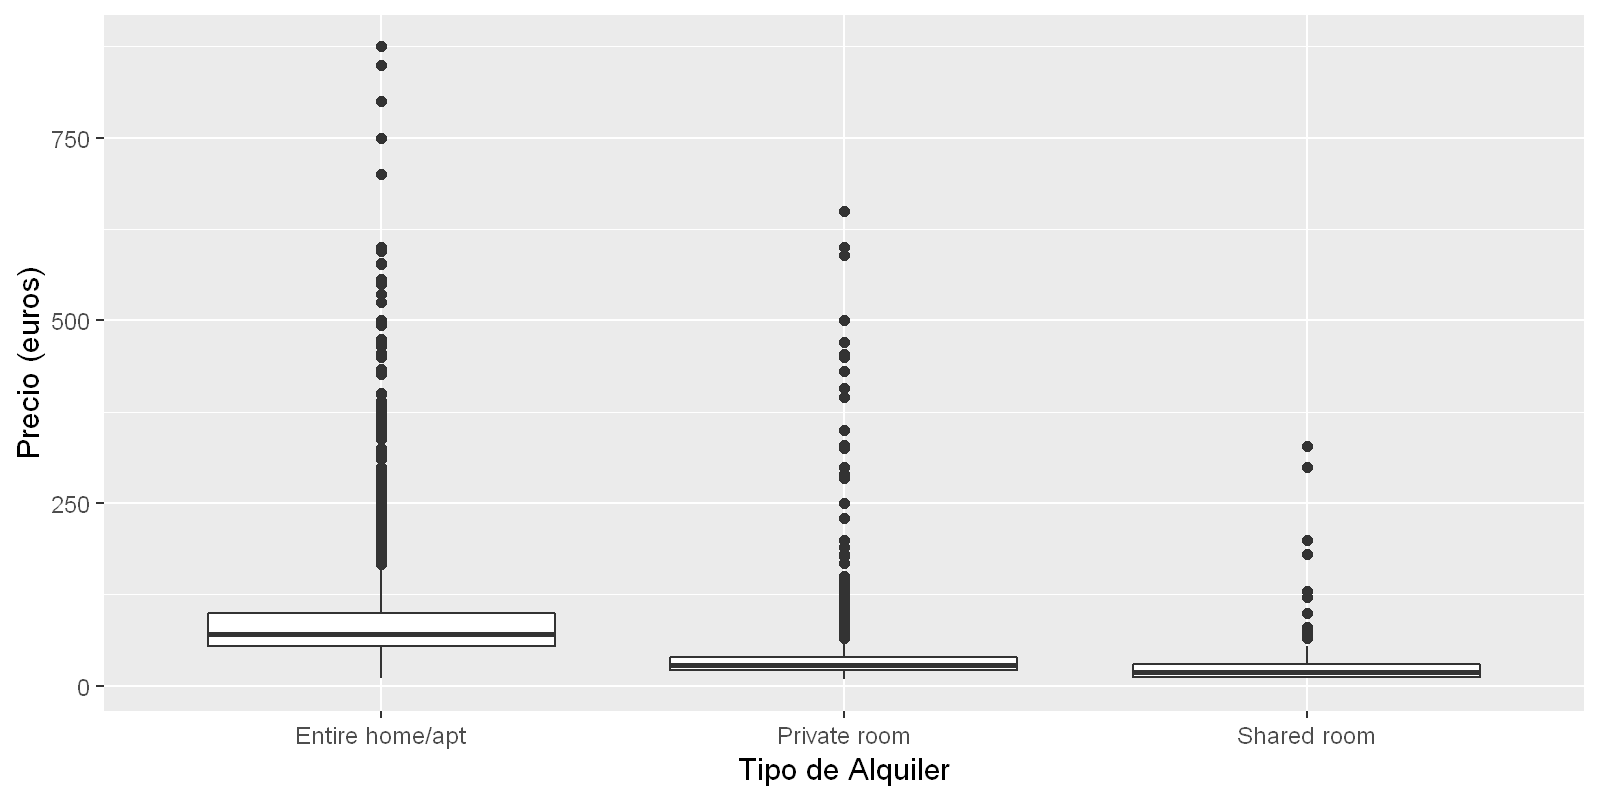

In [16]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio))+geom_boxplot()+
 xlab("Tipo de Alquiler")+ylab("Precio (euros)")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [17]:
mean(airbnb$Precio[airbnb$TipoAlquiler =="Entire home/apt"], na.rm=T)
mean(airbnb$Precio[airbnb$TipoAlquiler =="Private room"], na.rm=T)
mean(airbnb$Precio[airbnb$TipoAlquiler =="Shared room"], na.rm=T)
#test anoba, test t-student???

[1] 87.29661

[1] 34.25514

[1] 29.8534

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
library(tidyverse)
airbnb_entire = airbnb %>% filter(airbnb$TipoAlquiler=="Entire home/apt")
head(airbnb_entire, n = 10)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612
28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534


[1] "list"

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [19]:
tail(sort(table(airbnb_entire$Barrio)), 5)


     Cortes         Sol     Palacio Universidad Embajadores 
        574         701         769         984        1228 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
#tail(sort(table(airbnb_entire$Barrio)), 5)

library(rlist)

new = aggregate((airbnb_entire$Precio),list(airbnb_entire$Barrio),(mean),na.rm=TRUE)
new = new[order(new$x,decreasing=TRUE),c(1,2)]
colnames(new) <- c("Barrio", "Media")
head(new,n=5)

Warning message:
"package 'rlist' was built under R version 3.6.3"

,Barrio,Media
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El PlantÃ­o,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
df_2 = as.data.frame(table(airbnb_entire$Barrio))
colnames(df_2) <- c("Barrio", "Freq")
df_merge = merge(new, df_2)
head(df_merge[order(df_merge$Media,decreasing=TRUE),c(1,2,3)], n=5)

,Barrio,Media,Freq
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El PlantÃ­o,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
df_3 = df_merge[df_merge[,"Freq"] > 100,]
head(df_3[order(df_3$Media,decreasing=TRUE),c(1,2,3)], n=5)

,Barrio,Media,Freq
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 15 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

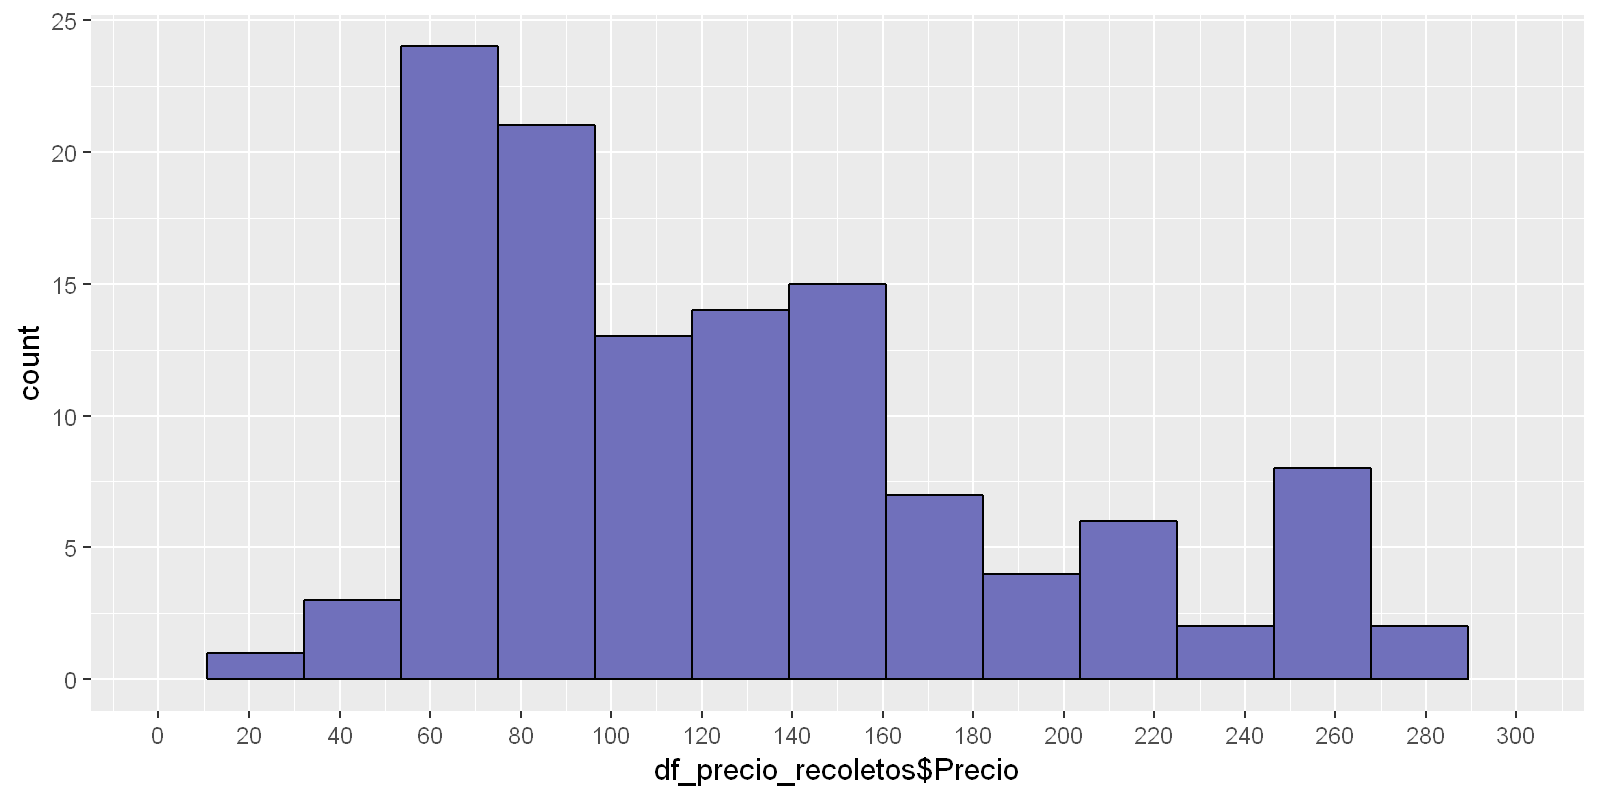

Warning message:
"Removed 6 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

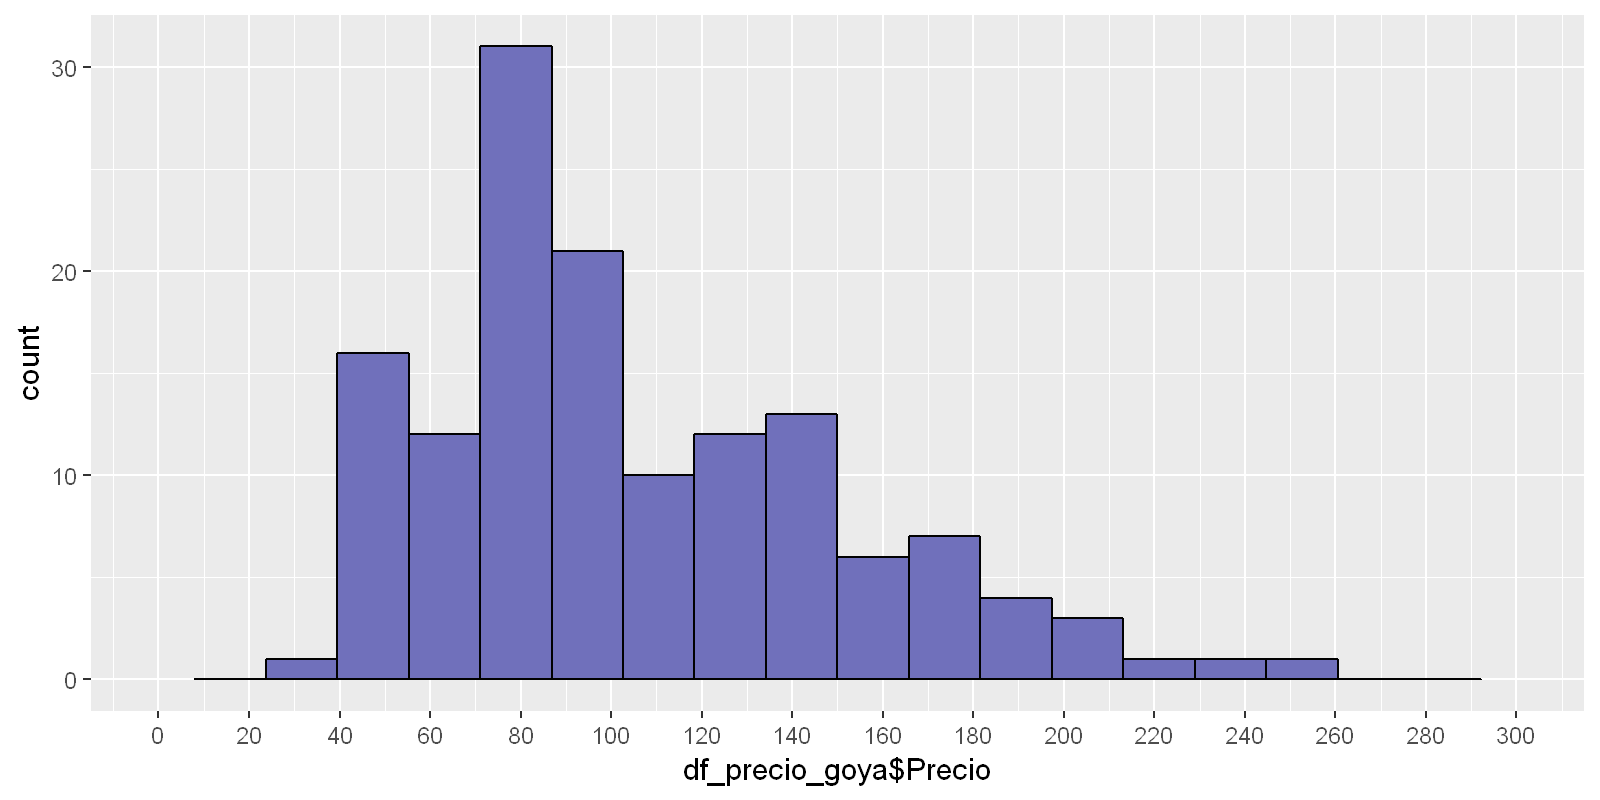

Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

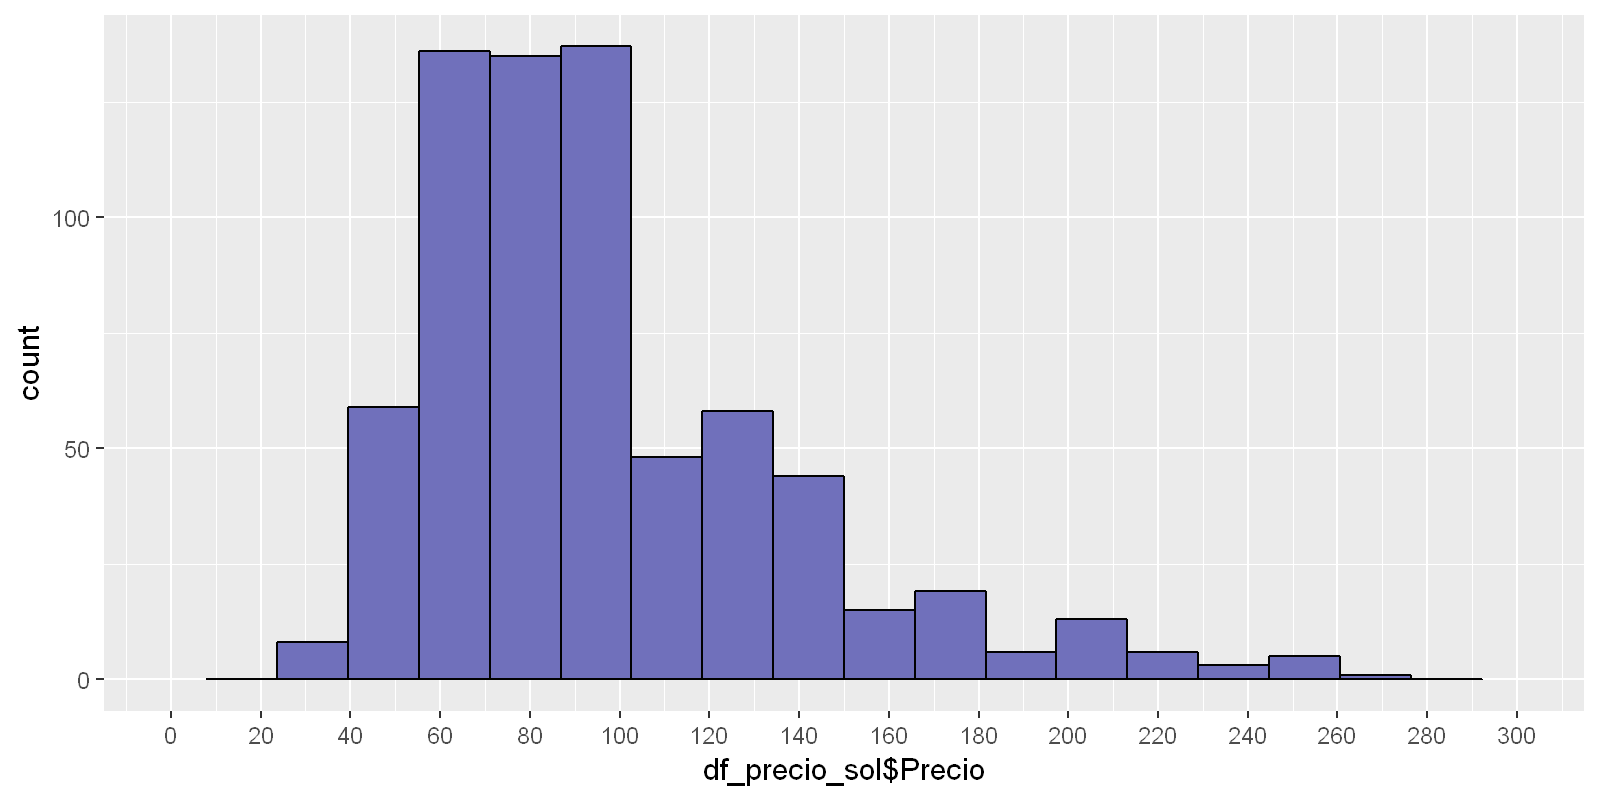

Warning message:
"Removed 9 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

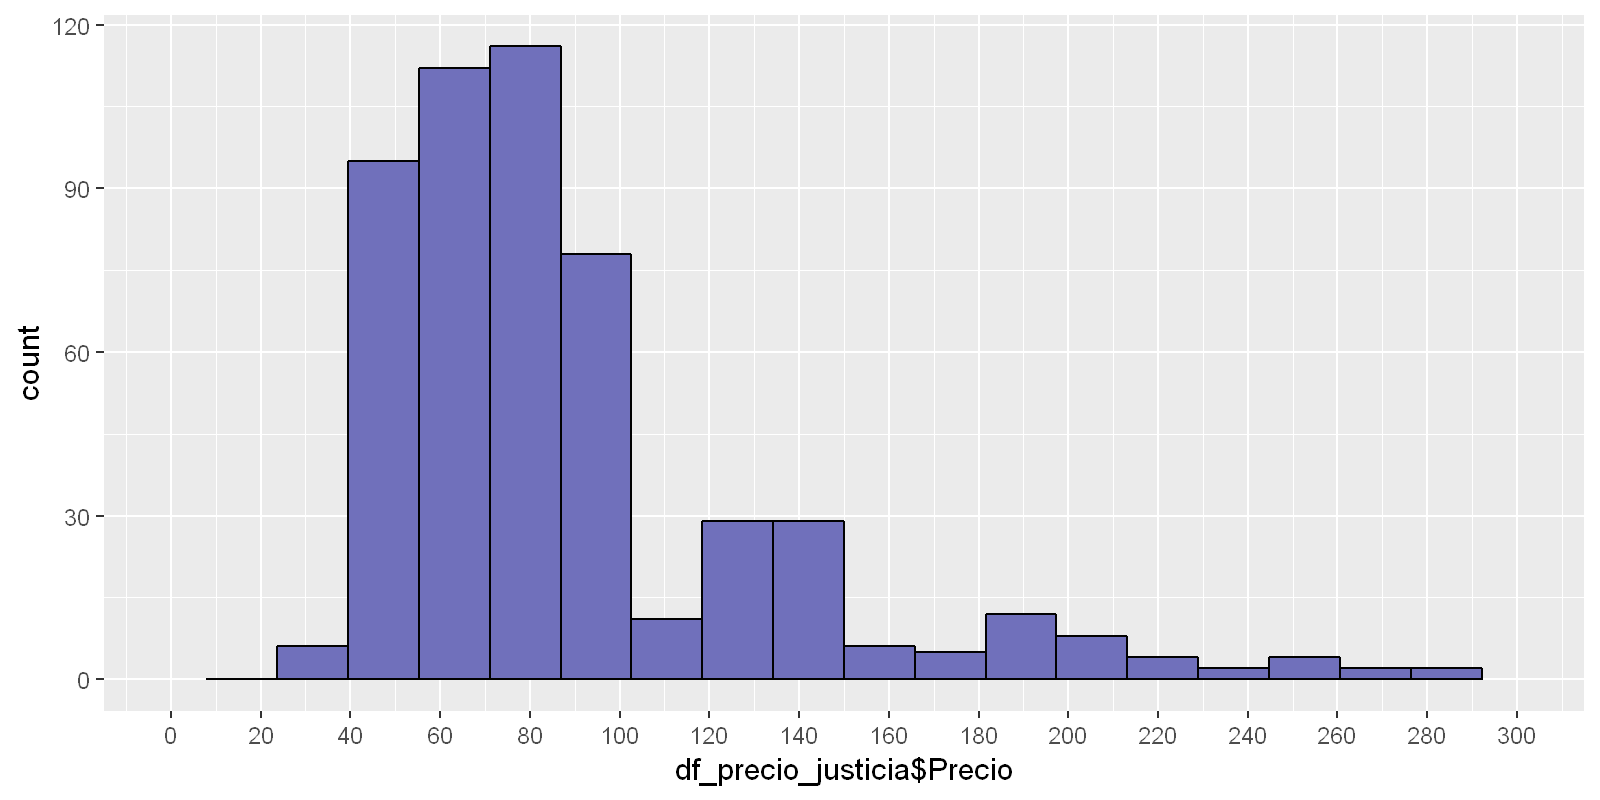

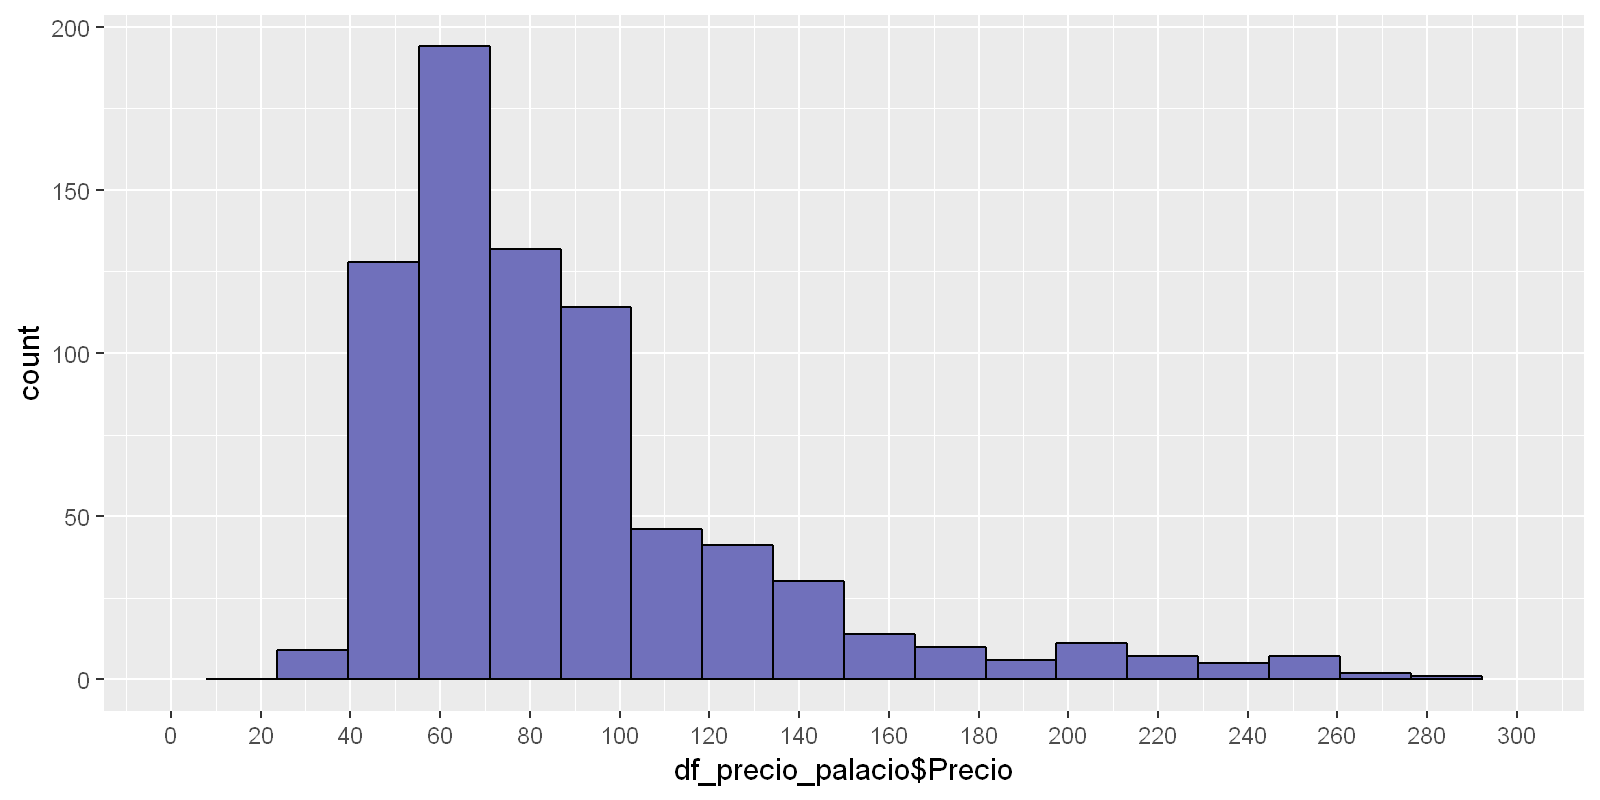

In [47]:
df_precio_recoletos = airbnb_entire[airbnb_entire[,"Barrio"] == "Recoletos",]
ggplot(data=data.frame(df_precio_recoletos$Precio), aes(x=df_precio_recoletos$Precio))+
 geom_histogram(bins=15,fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,300,20), lim=c(0,300))

df_precio_goya = airbnb_entire[airbnb_entire[,"Barrio"] == "Goya",]
ggplot(data=data.frame(df_precio_goya$Precio), aes(x=df_precio_goya$Precio))+
 geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,300,20), lim=c(0,300))

df_precio_sol = airbnb_entire[airbnb_entire[,"Barrio"] == "Sol",]
ggplot(data=data.frame(df_precio_sol$Precio), aes(x=df_precio_sol$Precio))+
geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
scale_x_continuous(breaks = seq(0,300,20), lim=c(0,300))

df_precio_justicia = airbnb_entire[airbnb_entire[,"Barrio"] == "Justicia",]
ggplot(data=data.frame(df_precio_justicia$Precio), aes(x=df_precio_justicia$Precio))+
geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
scale_x_continuous(breaks = seq(0,300,20), lim=c(0,300))

df_precio_palacio = airbnb_entire[airbnb_entire[,"Barrio"] == "Palacio",]
ggplot(data=data.frame(df_precio_palacio$Precio), aes(x=df_precio_palacio$Precio))+
geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
scale_x_continuous(breaks = seq(0,300,20), lim=c(0,300))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [24]:
df_4 = aggregate((airbnb_entire$MetrosCuadrados),list(airbnb_entire$Barrio),(mean),na.rm=TRUE)
colnames(df_4) <- c("Barrio", "Metros Cuadrados")
df_5 = merge(df_4,df_merge)
df_6 = df_5[df_5[,"Freq"] > 100,]
head(df_6[order(df_6$Media,decreasing=TRUE),c(1,2,3)], n=5)

,Barrio,Metros Cuadrados,Media
93,Recoletos,26.66316,161.92537
52,Goya,51.68504,111.33803
106,Sol,45.61692,100.75036
108,Trafalgar,29.30426,98.57848
59,Justicia,28.52669,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 132 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 139 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

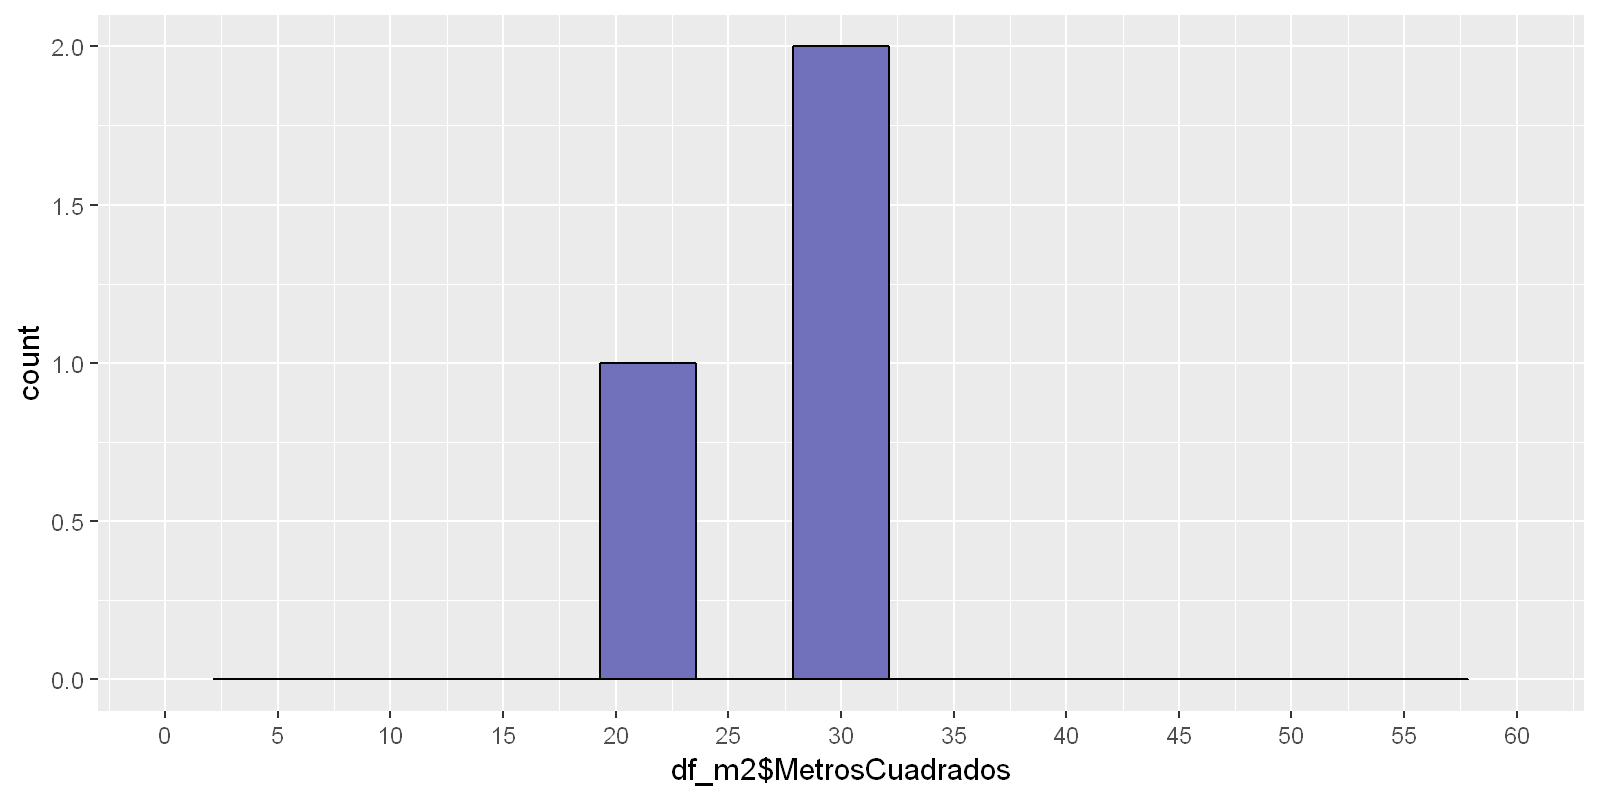

Warning message:
"Removed 641 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

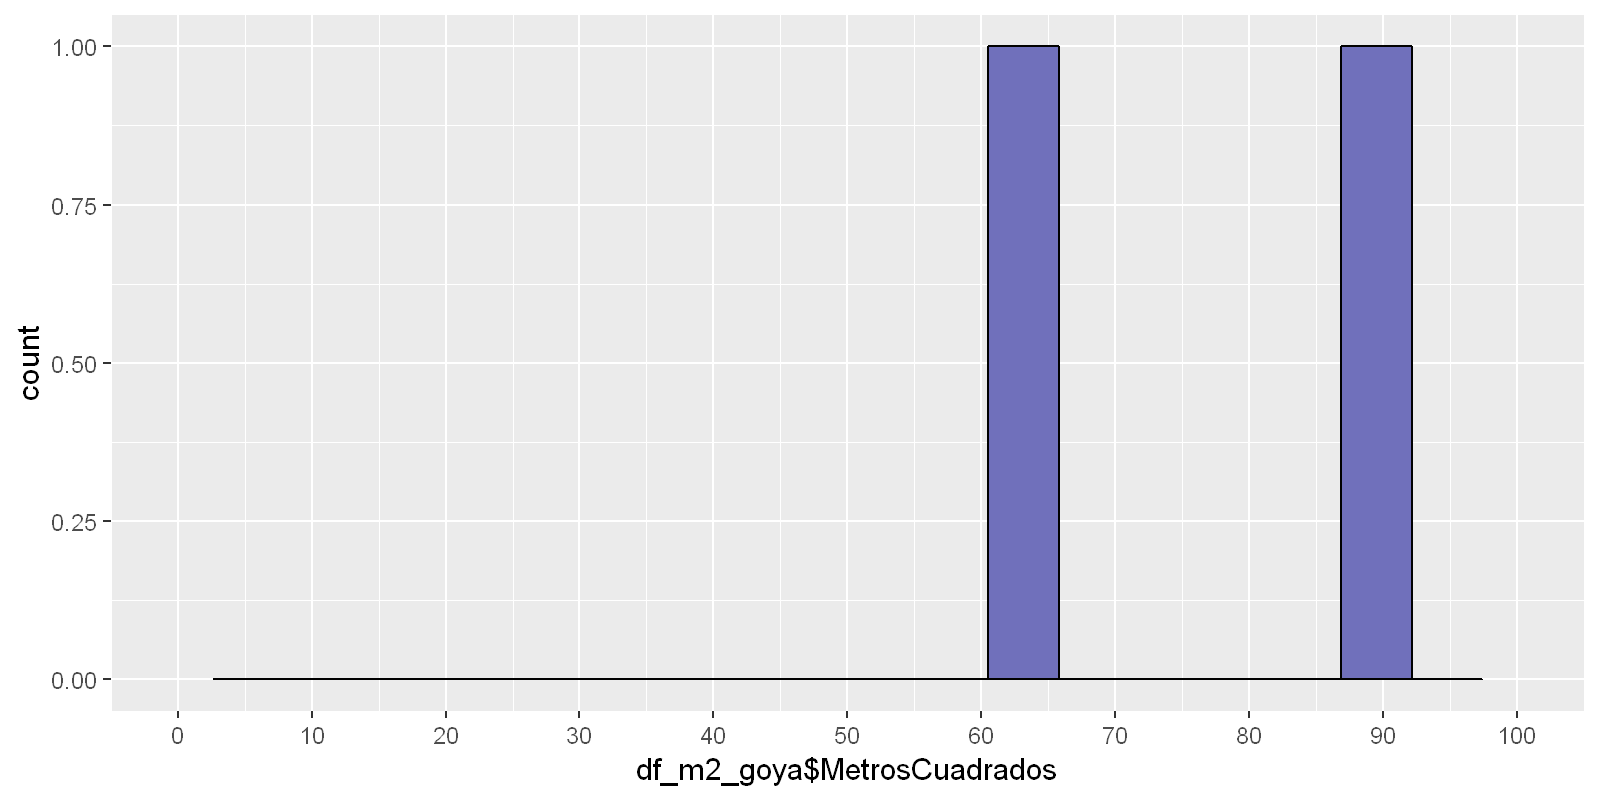

Warning message:
"Removed 517 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

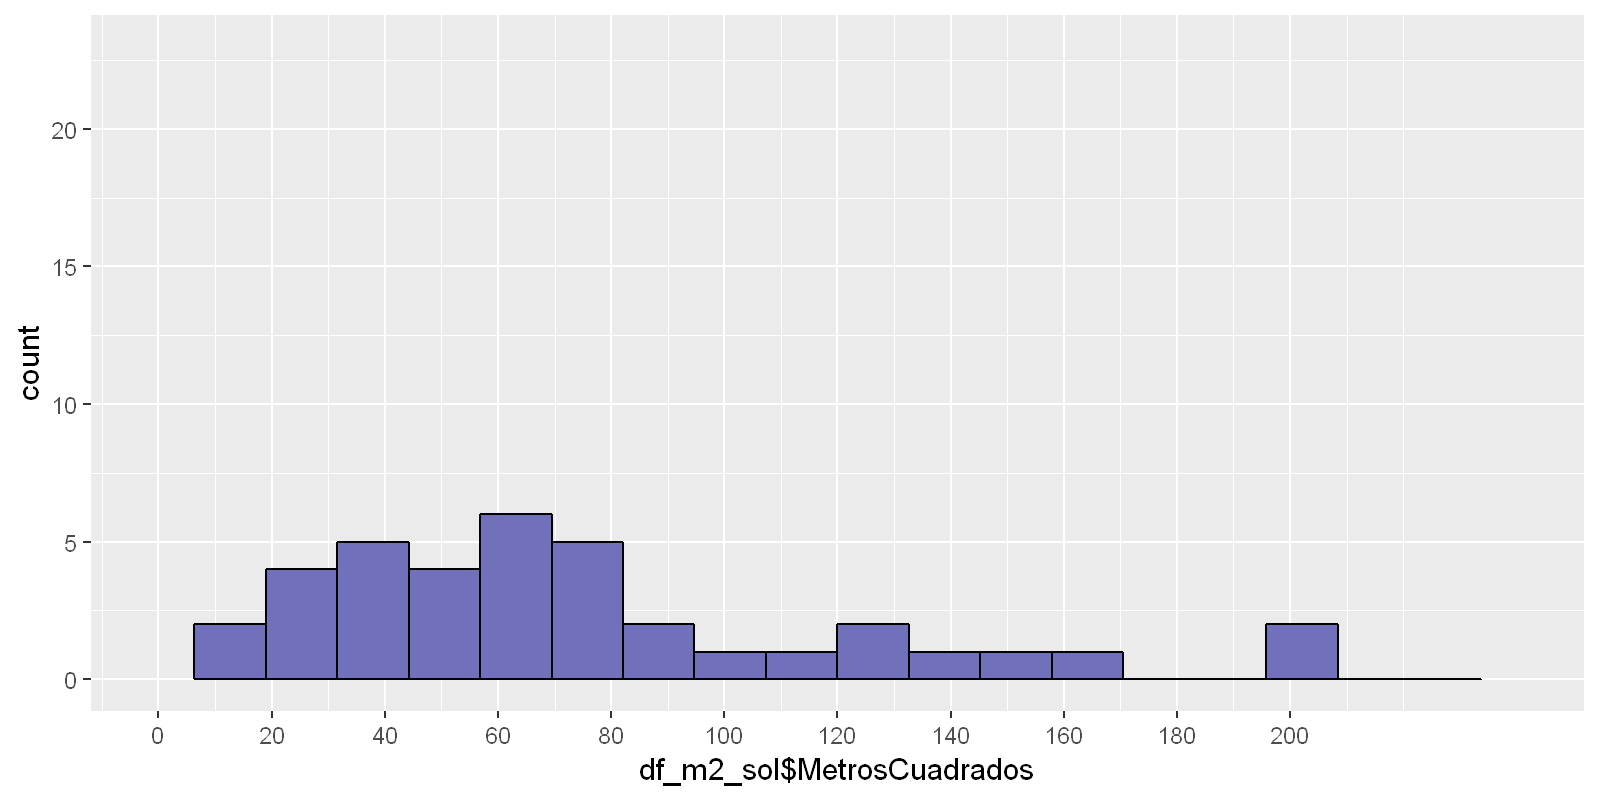

Warning message:
"Removed 740 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

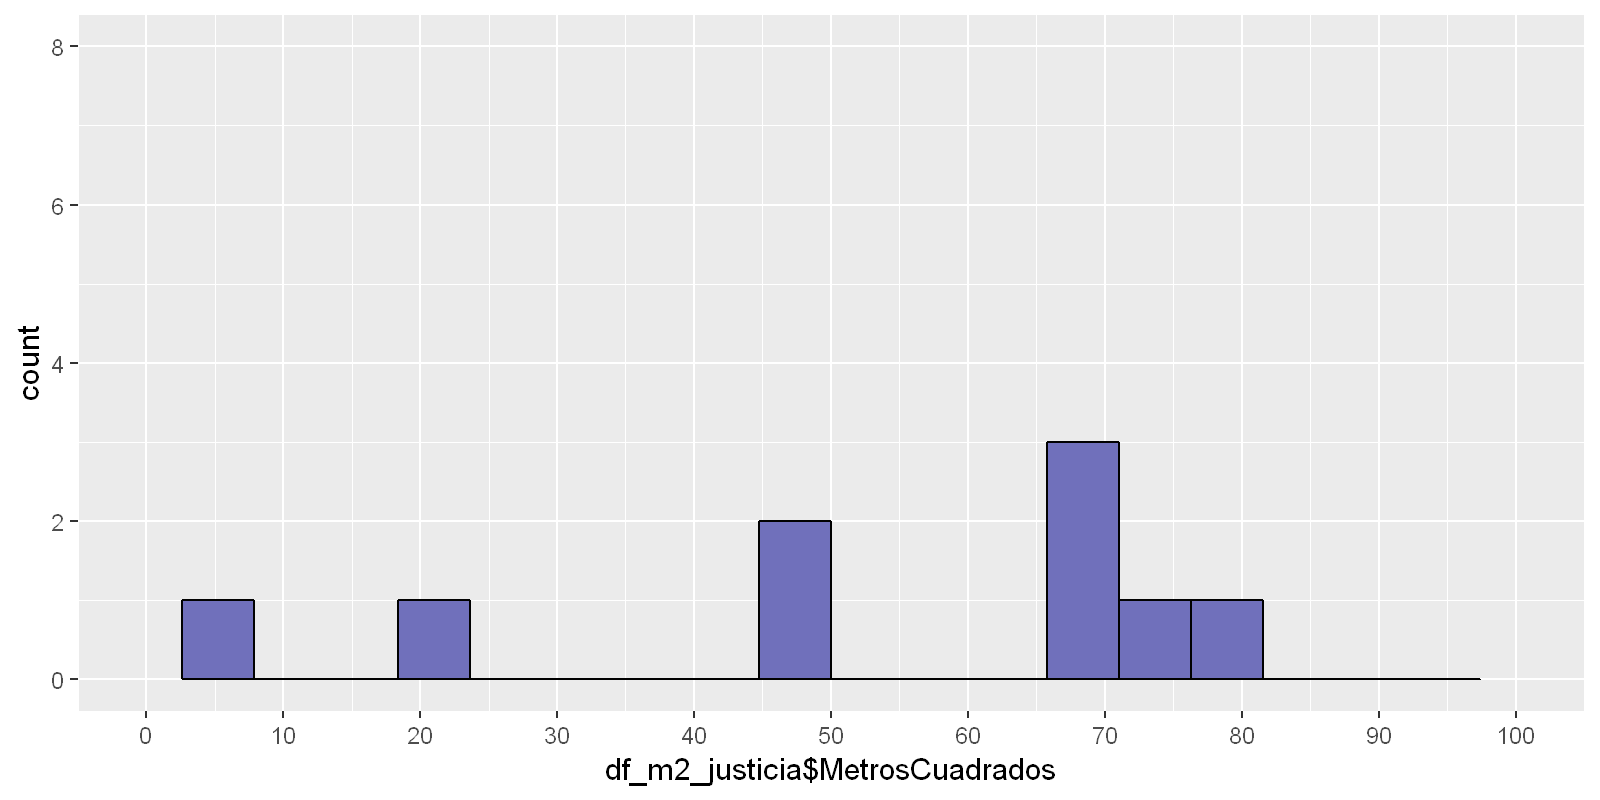

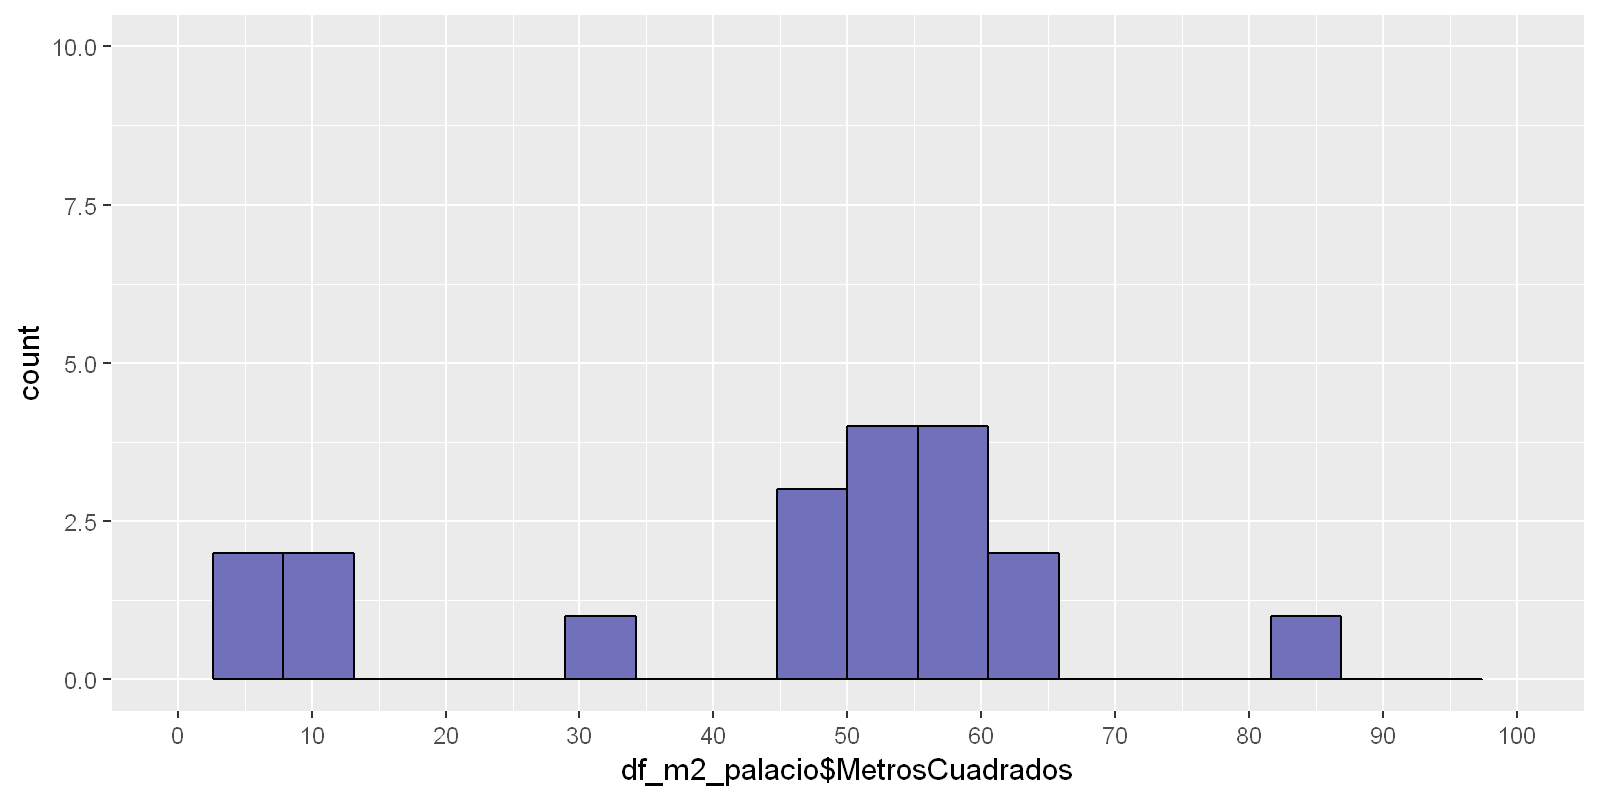

In [25]:
df_m2 = airbnb_entire[airbnb_entire[,"Barrio"] == "Recoletos",]
ggplot(data=data.frame(df_m2$MetrosCuadrados), aes(x=df_m2$MetrosCuadrados))+
 geom_histogram(bins=15,fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,60,5), lim=c(0,60))

df_m2_goya = airbnb_entire[airbnb_entire[,"Barrio"] == "Goya",]
ggplot(data=data.frame(df_m2_goya$MetrosCuadrados), aes(x=df_m2_goya$MetrosCuadrados))+
 geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,100,10), lim=c(0,100))

df_m2_sol = airbnb_entire[airbnb_entire[,"Barrio"] == "Sol",]
ggplot(data=data.frame(df_m2_sol$MetrosCuadrados), aes(x=df_m2_sol$MetrosCuadrados))+
geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
scale_x_continuous(breaks = seq(0,200,20), lim=c(0,240))

df_m2_justicia = airbnb_entire[airbnb_entire[,"Barrio"] == "Justicia",]
ggplot(data=data.frame(df_m2_justicia$MetrosCuadrados), aes(x=df_m2_justicia$MetrosCuadrados))+
geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
scale_x_continuous(breaks = seq(0,100,10), lim=c(0,100))

df_m2_palacio = airbnb_entire[airbnb_entire[,"Barrio"] == "Palacio",]
ggplot(data=data.frame(df_m2_palacio$MetrosCuadrados), aes(x=df_m2_palacio$MetrosCuadrados))+
geom_histogram(bins=20,fill="#7070BB",color="#010101")+ 
scale_x_continuous(breaks = seq(0,100,10), lim=c(0,100))

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [26]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [27]:
cr_X1_X2<-cor(barrio_sol$NumBanyos, barrio_sol$NumDormitorios)
cr_X1_X3<-cor(barrio_sol$NumBanyos, barrio_sol$MaxOcupantes)
cr_X1_X4<-cor(barrio_sol$NumBanyos, barrio_sol$MetrosCuadrados,use = "complete.obs")
cr_X2_X3<-cor(barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, use = "complete.obs")
cr_X2_X4<-cor(barrio_sol$NumDormitorios, barrio_sol$MetrosCuadrados, use = "complete.obs")
cr_X3_X4<-cor(barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados, use = "complete.obs")

cr_X1_X2
cr_X1_X3
cr_X1_X4
cr_X2_X3
cr_X2_X4
cr_X3_X4

[1] 0.6761906

[1] 0.6578162

[1] 0.4820549

[1] 0.7594598

[1] 0.5684521

[1] 0.4286233

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
"Removed 641 rows containing missing values (geom_point)."

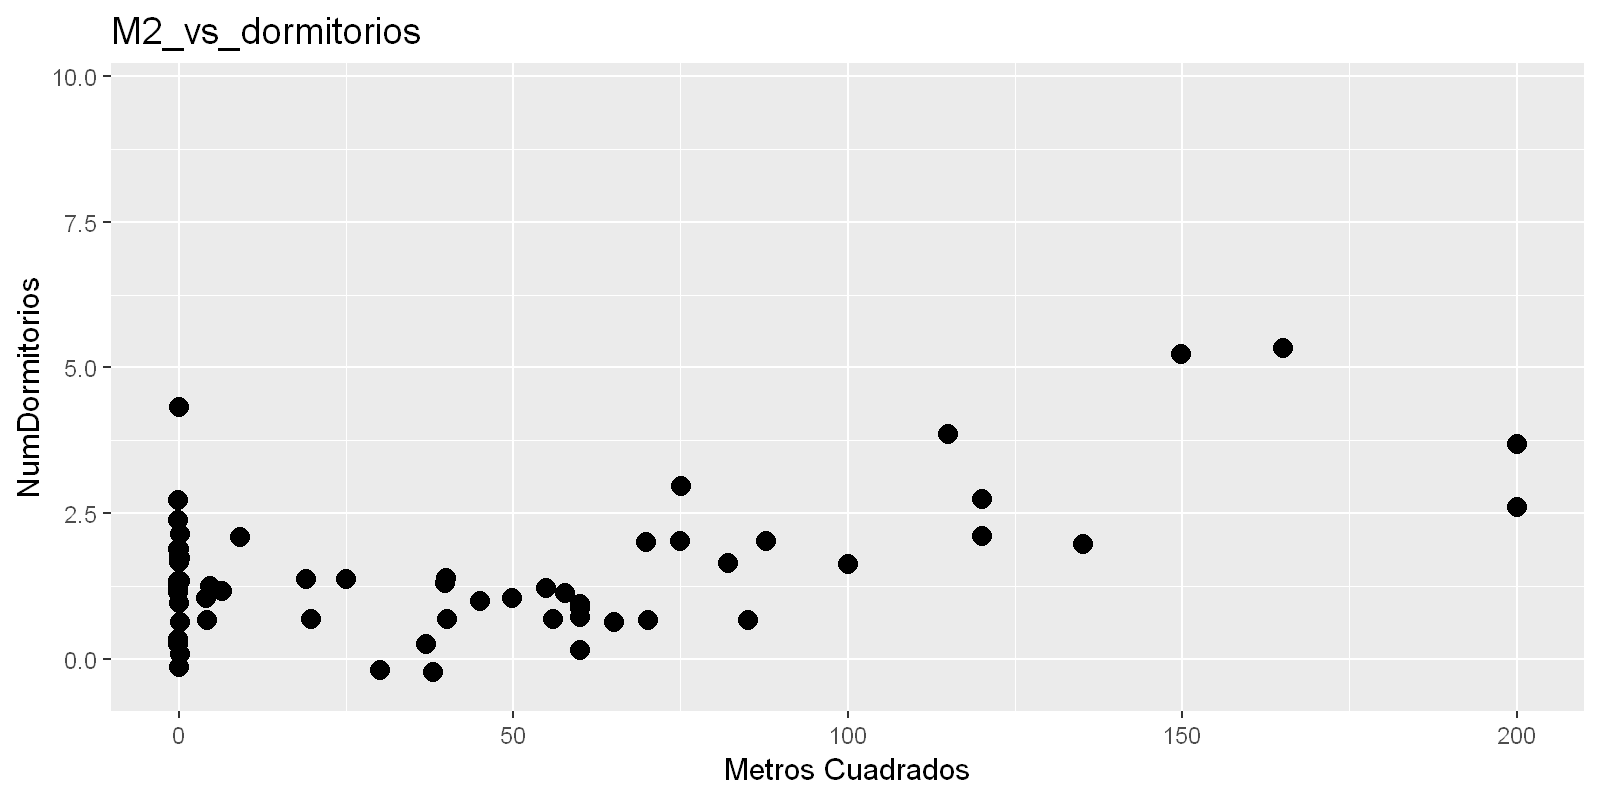

In [28]:
ggplot(data=barrio_sol, aes(x=barrio_sol$MetrosCuadrados, y =barrio_sol$NumDormitorios))+
  geom_jitter(size=3)+
xlab("Metros Cuadrados")+ylab("NumDormitorios")+
  ggtitle("M2_vs_dormitorios")

In [29]:
barrio_sol_2 = barrio_sol$MetrosCuadrados[barrio_sol["MetrosCuadrados"] == 0] <-NA
cr_X2_X4<-cor(barrio_sol$NumDormitorios, barrio_sol$MetrosCuadrados, use = "complete.obs")
cr_X2_X4

[1] 0.7717458

Warning message:
"Removed 661 rows containing missing values (geom_point)."

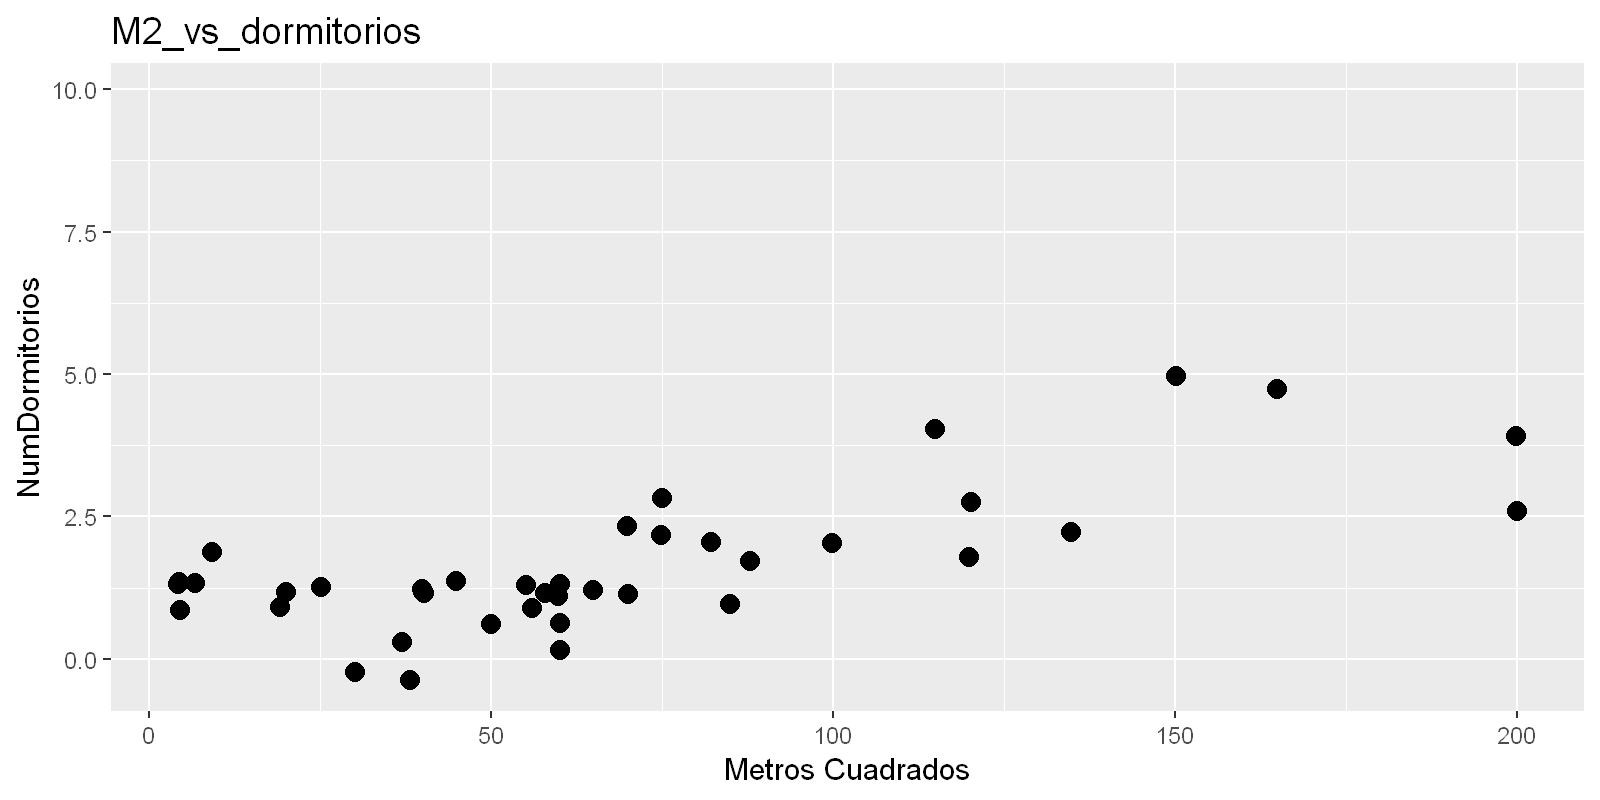

In [30]:
ggplot(data=barrio_sol, aes(x=barrio_sol$MetrosCuadrados, y =barrio_sol$NumDormitorios))+
  geom_jitter(size=3)+
xlab("Metros Cuadrados")+ylab("NumDormitorios")+
  ggtitle("M2_vs_dormitorios")

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [33]:
library(MASS)
#no.na.data <- na.omit(barrio_sol[c(barrio_sol$Precio, barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados)])
model<-lm(formula=Precio~NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados,barrio_sol)
stepAIC(model,trace=FALSE)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Coefficients:
    (Intercept)   NumDormitorios  MetrosCuadrados  
        36.8284          32.5581           0.2153  


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [48]:
model_opt <-lm(formula=Precio~NumDormitorios+MetrosCuadrados,barrio_sol)
summary(model_opt)
#Es mas fiable el numero de dormitorios (pvalue =2.67e-06)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.134 -16.183  -0.823  15.801  68.085 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.8284     7.9805   4.615 4.61e-05 ***
NumDormitorios   32.5581     5.8817   5.535 2.67e-06 ***
MetrosCuadrados   0.2153     0.1449   1.486    0.146    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.88 on 37 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7393 
F-statistic: 56.31 on 2 and 37 DF,  p-value: 5.952e-12


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [49]:
model_opt$coefficients

(Intercept)  NumDormitorios MetrosCuadrados 
       36.82842        32.55813         0.21525

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (701): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.d

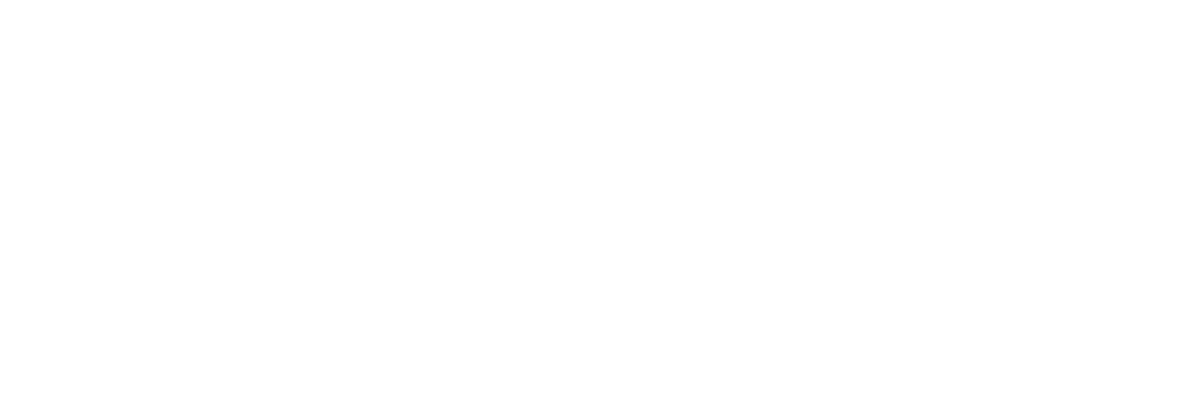

In [77]:
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6)

mydt<-function(x,df,mn,sd){
    dt((x-mn)/sd,df)
}

vcov_matrix <- vcov(model_opt)



ggplot(data=barrio_sol, aes(x=X)) +     
    stat_function(fun=mydt,args = list(df = 8,mn=model_opt$coefficients[1],sd=sqrt(diag(vcov_matrix))[3]),color="#2222BB")+
    geom_vline(xintercept=qt(0.975,8,lower.tail = F)*sqrt(diag(vcov_matrix))[3]+model$coefficients[3])+
    geom_vline(xintercept=qt(0.025,8,lower.tail = F)*sqrt(diag(vcov_matrix))[3]+model$coefficients[3])+
    xlim(-10,40)

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (701): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.d

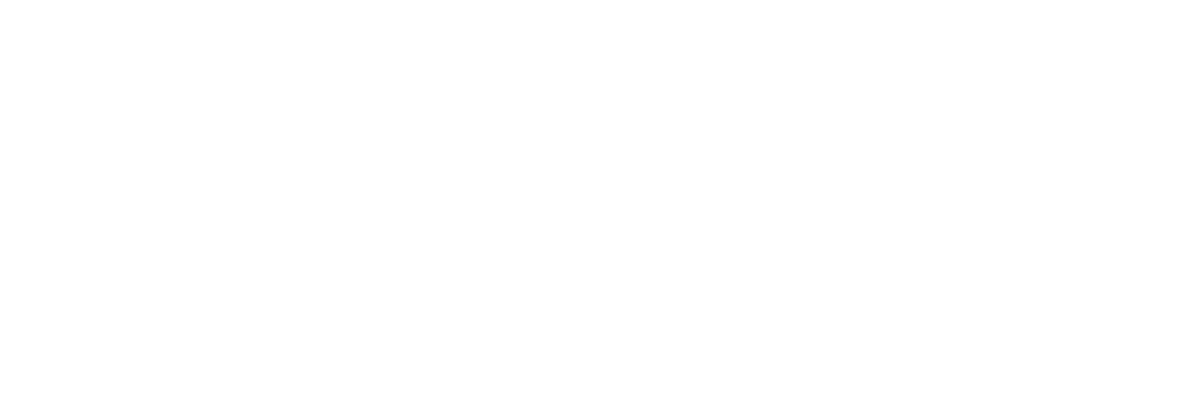

In [75]:
ggplot(data=barrio_sol, aes(x=X)) +     
    stat_function(fun=mydt,args = list(df = 8,mn=model_opt$coefficients[2],sd=sqrt(diag(vcov_matrix))[2]),color="#2222BB")+
    geom_vline(xintercept=qt(0.975,8,lower.tail = F)*sqrt(diag(vcov_matrix))[2]+model$coefficients[2])+
    geom_vline(xintercept=qt(0.025,8,lower.tail = F)*sqrt(diag(vcov_matrix))[2]+model$coefficients[2])+
    xlim(-10,40)

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [ ]:
binom.test